In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
import pandas as pd
Kayaking= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Kayaking")
Triathlon= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Triathlon")
Fencing= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Fencing")
Athletes=pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
AllAthletes=pd.read_excel("AllAthletesData.xlsx")
AllAthletes.head()

C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,ID,time,RR,VO2,power
0,1,-130.840,672.0,0.302008,0
1,1,-130.168,672.0,0.302008,0
2,1,-129.536,632.0,0.301336,0
3,1,-128.824,712.0,0.301336,0
4,1,-127.948,876.0,0.301336,0


In [39]:
df_excersizetype['HR']=60/(df_excersizetype['RR']/1000)
df_excersizetype
df_excersizetype.loc[df_excersizetype['HR'] < 100,'Zone Type']='Zone 1'
df_excersizetype.loc[(df_excersizetype['HR'].between(100,120)), 'Zone Type'] = 'Zone 2'
df_excersizetype.loc[(df_excersizetype['HR'].between(121,135)), 'Zone Type'] = 'Zone 3'
df_excersizetype.loc[(df_excersizetype['HR'].between(136,155)), 'Zone Type'] = 'Zone 4'
df_excersizetype.loc[df_excersizetype['HR'] > 155, 'Zone Type'] = 'Zone 5'
df_excersizetype

,ID,time,RR,VO2,power,ExType,HR,Zone Type
0,1,-130.840,672.0,0.302008,0,Warm Up,89.285714,Zone 1
1,1,-130.168,672.0,0.302008,0,Warm Up,89.285714,Zone 1
2,1,-129.536,632.0,0.301336,0,Warm Up,94.936709,Zone 1
3,1,-128.824,712.0,0.301336,0,Warm Up,84.269663,Zone 1
4,1,-127.948,876.0,0.301336,0,Warm Up,68.493151,Zone 1
...,...,...,...,...,...,...,...,...
52057,18,947.288,536.0,0.507071,0,Cool Down,111.940299,Zone 2
52058,18,947.816,528.0,0.507071,0,Cool Down,113.636364,Zone 2
52059,18,948.344,528.0,0.507071,0,Cool Down,113.636364,Zone 2
52060,18,948.884,540.0,0.507071,0,Cool Down,111.111111,Zone 2


Q1 Join all sport-related tables to produce one dataframe that has all athletes values. 
The final table should only have the same 5 columns: ID, time,power,RR, vo2, power.
Write this dataframe to an excel file.


In [34]:
dataframe=pd.concat([Kayaking,Triathlon,Fencing])
dataframe                    

,ID,time,RR,VO2,power
0,11,-168.600,727.0,0.287147,0
1,11,-167.872,728.0,0.287147,0
2,11,-167.148,724.0,0.287147,0
3,11,-166.484,664.0,0.320580,0
4,11,-165.836,648.0,0.320580,0
...,...,...,...,...,...
27598,10,942.700,428.0,0.786363,0
27599,10,943.124,424.0,0.786363,0
27600,10,943.552,428.0,0.786363,0
27601,10,943.976,424.0,0.786363,0


In [25]:
df_excersizetype=pd.read_excel('AllAthletesData.xlsx',sheet_name='AllAthletesData')
df_excersizetype.loc[df_excersizetype['time'] < 0,'ExType']='Warm Up' 
df_excersizetype.loc[(df_excersizetype['time'] >= 0) & (df_excersizetype['power'] > 0), 'ExType'] = 'GET'
df_excersizetype.loc[(df_excersizetype['time'] >= 0) & (df_excersizetype['power'] == 0), 'ExType'] = 'Cool Down'
df_excersizetype

,ID,time,RR,VO2,power,ExType
0,1,-130.840,672.0,0.302008,0,Warm Up
1,1,-130.168,672.0,0.302008,0,Warm Up
2,1,-129.536,632.0,0.301336,0,Warm Up
3,1,-128.824,712.0,0.301336,0,Warm Up
4,1,-127.948,876.0,0.301336,0,Warm Up
...,...,...,...,...,...,...
52057,18,947.288,536.0,0.507071,0,Cool Down
52058,18,947.816,528.0,0.507071,0,Cool Down
52059,18,948.344,528.0,0.507071,0,Cool Down
52060,18,948.884,540.0,0.507071,0,Cool Down


Q49 Retrieve the row with minimum IBI for fencing athletes using sorting technique.

Q50 Create a violin chart using any 2 columns in the dataset

C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


<Axes: xlabel='Gender', ylabel='age'>

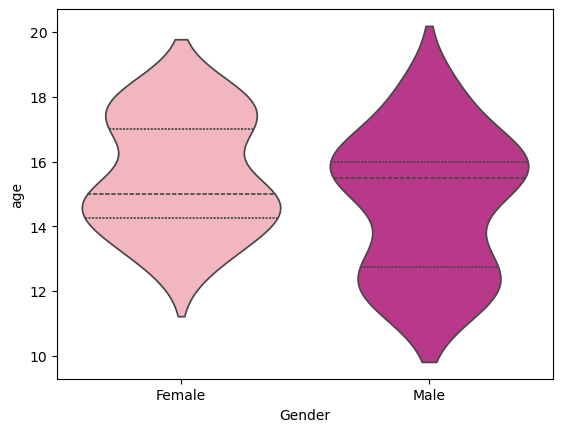

In [36]:
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
sns.violinplot(x='Gender',y='age',data= Athletes,inner='quartile',bw=0.5,hue='Gender',palette='RdPu')


Q51 List every athlete’s V02 ml/kg

In [15]:
AllAthletes=pd.read_excel("AllAthletesData.xlsx")
#List every athlete's VO2 ml/kg
VO2_values=AllAthletes['VO2']
print(VO2_values)

0        0.302008
1        0.302008
2        0.301336
3        0.301336
4        0.301336
           ...   
52057    0.507071
52058    0.507071
52059    0.507071
52060    0.507071
52061    0.507071
Name: VO2, Length: 52062, dtype: float64


Q52 Using all markers of fitness available to you, who is fittest athlete. Write 1-2 lines about the analysis that led to your insight.

Q53 phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Jill

In [48]:
phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}
Jill_phno=phonebook["Jill"]
print("Jill's phone number is",Jill_phno)


Jill's phone number is 947662781


Q54 Create a Pie chart for  Athletes and explode the widge with Highest V02 kg/ml in and Label by Athlete ID

Q55 Using a for loop iterate through HR for all trathletes and display all details of the athlete with the highest heart rate

Q56 Display a histogram to show distribution of athletes by sport.

C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Text(0, 0.5, 'Frequency')

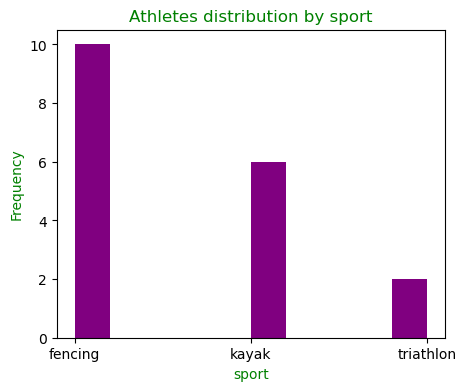

In [80]:
plt.figure(figsize=(5,4))
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
Athletes['sport'].hist(color='purple',grid= False)

#add labels and title
plt.title('Athletes distribution by sport',fontsize=12,color='green')
plt.xlabel('sport',fontsize=10,color='green')
plt.ylabel('Frequency',fontsize=10,color='green')




Q57 get the first letter of last name of students using for loops and RegEX

Q58 What is the average % difference in heart rate between warm up and GET for all athletes?

Q59 Who is the tallest athlete in the dataset. What is his sport and his Vo2 ml/kg?

C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Q60 get the last letter      of athletes last names using RegEX

In [5]:
import re
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
text_column=Athletes['Last Name']
last_letter= text_column.str.extract(r'(\w)$')
print(last_letter)

    0
0   z
1   s
2   r
3   z
4   n
5   z
6   s
7   t
8   e
9   n
10  n
11  n
12  r
13  l
14  e
15  n
16  r
17  s


C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Q61 Reverse an arrays order in Python. You can use any array with any values you like.

In [3]:
#Define a simple array
arr=[11,12,13,14,15,16,17,18]
#Reverse the array
Rev_arr=arr[::-1]
print(Rev_arr)

[18, 17, 16, 15, 14, 13, 12, 11]


Q62 What is the root mean of successive differences for 30 consecutive minutes for each athlete.

Q63 On average how many minutes did each athlete in the sport of fencing spend in Zone 5?

Q64 Count athletes based on Gender using count plot

C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


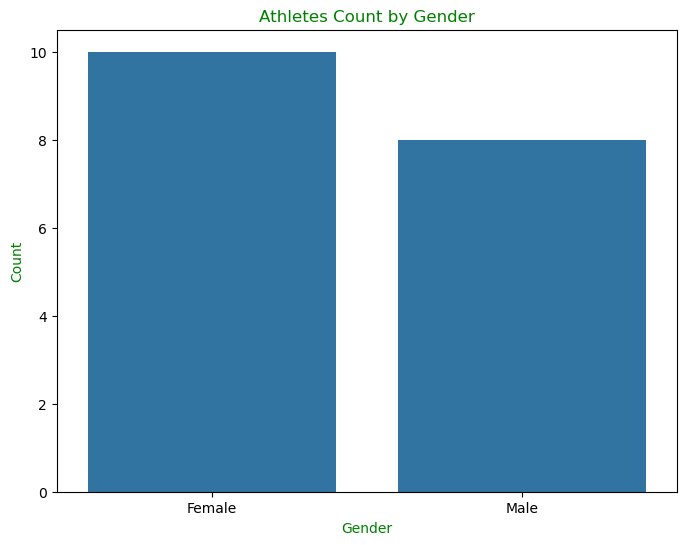

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
Athletes=pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
#create a count plot
plt.figure(figsize=(8,6))
sns.countplot(x='Gender',data=Athletes)
#add labels and title
plt.title('Athletes Count by Gender',fontsize=12,color='green')
plt.xlabel('Gender',fontsize=10,color='green')
plt.ylabel('Count',fontsize=10,color='green')
plt.show()
